<span style="color:grey"> By Seongchan Kang </span>

<span style="color:grey"> Version : Python 3.10.1 in Window </span>

# 모델링(Modeling) 기법 선택

현재 올리지는 못했지만 올리고 싶었던 선택 알고리즘을 통해 모델링할 기법을 고름.

- 데이터가 글이나 시계열은 아님
- 범주를 예측함
- 데이터가 식별값을 가짐
- 그렇다면 분류에 해당함(로지스틱 회귀, 선형, 최근접, svm, 딥러닝, 의사결정 나무 등...)
- 2번째로는 의사결정 나무(Decsion Tree)를 실습하고자 함
- 로지스틱 회귀의 경우 이중분류라고 한다면, 의사결정 나무는 다중 분류라고 볼 수 있음. 두 가지의 결과를 비교하고자 함.

# 의사결정 나무란

아래로 뻗어나가는 가지만큼 과대 적합이나 과서 적합이 이루어질 수 있음

이를 유의하고 적절한 가지수를 정하는게 중요

아래 URL링크는 의사결정나무의 장단점 등을 잘 정리하는거 같아서 가져옴

<span>https://rk1993.tistory.com/entry/%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%ACDecision-Tree-%EC%89%BD%EA%B2%8C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0</span>

# 의사결정나무 실습

## 라이브러리 및 파일 불러오기

In [3]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [4]:
# 파일 불러오기
data = pd.read_csv("titanic_df.csv")
data = data.drop(labels = "Unnamed: 0", axis = 1)
data

,Sex,Embarked,ToH,Survived,Pclass,Age,Fare,Family
0,0,0,2,0,3,22,7.2500,0
1,1,1,3,1,1,38,71.2833,0
2,1,0,1,1,3,26,7.9250,0
3,1,0,3,1,1,35,53.1000,0
4,0,0,2,0,3,35,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,0,4,0,2,27,13.0000,0
887,1,0,1,1,1,19,30.0000,0
888,1,0,1,0,3,21,23.4500,1
889,0,1,2,1,1,26,30.0000,0


In [5]:
# X, Y로 변수를 나누기(독립괴 종속 변수)
X = data[['Sex', 'Embarked', 'ToH', 'Pclass', 'Age', 'Fare', 'Family']]
Y = data['Survived']

# 훈련과 테스트로 변수 다시 한번더 나누기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

## 모델링 및 학습

파라미터 설명
- min_samples_split
  > - 노드를 분할하기 위한 최소 샘플 데이터 개수 
  > - 디폴트 값 : 2

- min_samples_leaf
  > - 리프 노드가 되기 위한 최소 샘플 데이터 개수

- max_features
  > - 최적의 분할을 위해 고려할 최대 피처 개수
  > - None : 모든 피처 개수
  > - int : 사용할 피처 개수 설정
  > - float : 사용할 피처 개수를 퍼센트로 설정
  > - sqrt : 루트(전체 피처 개수)를 계산하여 설정
  > - auto : sqrt와 동일
  > - log  : log_2(전체 피처 개수)를 계산하여 설정

- max_depth
  > - 트리의 최대 깊이

- max_leaf_nodes
  > - 리프 노드에 들어가는 샘플 데이터의 최대 개수 

- random_state
  > - 실행 시마다 결과를 고정하고 싶다면 임의의 정수로 설정
  > - 근사 알고리즘의 초기 상태가 실행 시마다 달라질 수 있어서 초기값을 일정하게 고정시킴

In [6]:
# 모델 할당
dTree = DecisionTreeClassifier(random_state = 5)

# 학습 (모든 리프 노드 사용)
dTree_fit = dTree.fit(X_train, Y_train)

In [7]:
# 하이퍼 매개변수
print("<현 모델의 하이퍼 매개변수>")
print(dTree_fit.get_params())

<현 모델의 하이퍼 매개변수>
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 5, 'splitter': 'best'}


## 테스트 및 평가

- 평가를 보면 학습 데이터에 대한 평가가 매우 좋음, 평가 데이터는 로지스틱에 비해 평가가 떨어지긴함
- 하지만 DecisionTree는 다중 분류에서도 쓰이기 때문에 이것 하나로 단순히 좋고 안좋고를 판단하기엔 무리가 있임
- 그저 두 기법을 같이 보고자 하는 것

In [8]:
# 평가
print("Train Set Score1 : {}".format(dTree.score(X_train, Y_train)))
print("Test  Set Score1 : {}".format(dTree.score(X_test, Y_test)))

Train Set Score1 : 0.985553772070626
Test  Set Score1 : 0.7649253731343284


## 그리드서치(GridSearchCV)

적절한 매개변수를 찾기위해 여러가지 매개변수를 넣어보고 돌려보는 등의 작업이 이루어짐

이러한 과정을 적절한 매개변수를 찾기 쉽게 만드는 방법

In [9]:
# 돌려볼 매개변수 미리 선언
params = {"max_depth" : [3, 4, 5, 6, 7]}

# 그리드 서치로 모델링
grid_cv = GridSearchCV(dTree, param_grid = params, scoring = "accuracy", cv = 5, return_train_score = True)

# 적합(=학습)
grid_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'max_depth': [3, 4, 5, 6, 7]}, return_train_score=True,
             scoring='accuracy')

In [10]:
# 데이터 프레임으로 받음
grid_result_df = pd.DataFrame(grid_cv.cv_results_)

# 필요한 칼럼만 가져와서 보기
grid_result_df[["param_max_depth", "mean_fit_time", "mean_train_score", "mean_test_score", "rank_test_score"]]

## 확인하면 아래에 정확도가 올라간 것을 확인할 수 있음

,param_max_depth,mean_fit_time,mean_train_score,mean_test_score,rank_test_score
0,3,0.007196,0.847910,0.828206,1
1,4,0.005993,0.857134,0.824955,2
2,5,0.006206,0.867573,0.816968,3
3,6,0.004872,0.884029,0.805755,5
4,7,0.004589,0.902489,0.810542,4


In [11]:
# 매개변수 가 
# 돌려볼 매개변수 미리 선언
params = {
  "max_depth" : [3, 4, 5, 6, 7],
  "min_samples_split" : [8, 16, 24]
  }

# 그리드 서치로 모델링
grid_cv = GridSearchCV(dTree, param_grid = params, scoring = "accuracy", cv = 5, return_train_score = True)

# 적합(=학습)
grid_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_split': [8, 16, 24]},
             return_train_score=True, scoring='accuracy')

In [12]:
# 데이터 프레임으로 받음
grid_result_df = pd.DataFrame(grid_cv.cv_results_)

# 필요한 칼럼만 가져와서 보기
grid_result_df[["param_max_depth", "param_min_samples_split", "mean_fit_time", "mean_train_score", "mean_test_score", "rank_test_score"]]

## 하이퍼파라미터를 여러가지 설정하여 아래와 같은 결과를 가져올 수 잇음

,param_max_depth,param_min_samples_split,mean_fit_time,mean_train_score,mean_test_score,rank_test_score
0,3,8,0.007592,0.847910,0.828206,1
1,3,16,0.006616,0.847107,0.825006,2
2,3,24,0.005304,0.847107,0.825006,2
3,4,8,0.009468,0.857134,0.824955,4
4,4,16,0.006403,0.856331,0.821755,6
5,4,24,0.007096,0.854326,0.823368,5
6,5,8,0.005349,0.865165,0.816955,9
7,5,16,0.004301,0.863558,0.815355,13
8,5,24,0.004136,0.860350,0.815368,10
9,6,8,0.004361,0.879614,0.807355,15


## 시각화

### 변수의 중요도 시각화

In [13]:
# 우선 그리드서치의 베스트 모델을 가져오기
best_dt = grid_cv.best_estimator_
best_predict = best_dt.predict(X_test)
best_accuracy = accuracy_score(Y_test, best_predict)

print("Best Decision Tree Accuracy", best_accuracy)

Best Decision Tree Accuracy 0.7910447761194029


In [14]:
# 라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# 베스트 모델의 변수의 중요도 뽑아오기
feature_importance = best_dt.feature_importances_

# 시리즈로 정리
feature_importance_value = pd.Series(feature_importance, index = X_train.columns)

# 내림차순으로 정리
feature_top_5 = feature_importance_value.sort_values(ascending = False)

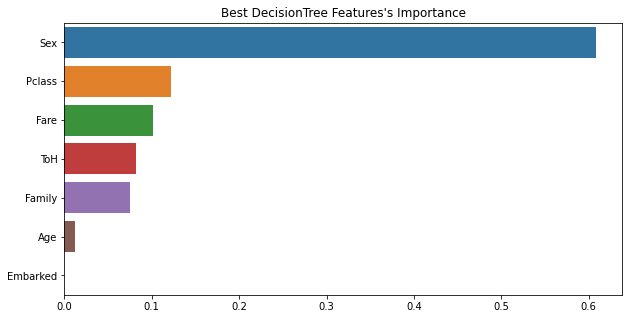

In [16]:
# 시각화
plt.figure(figsize = (10,5))
plt.title("Best DecisionTree Features's Importance")
sns.barplot(x = feature_top_5, y = feature_top_5.index)
plt.show()

### 트리모양 시각화

- 여기서 사용하는 Graphviz를 사용하기 위해서는 사전 작업이 필요
  > 1. <span>https://www2.graphviz.org/Packages/stable/windows/10/cmake/Release/x64/</span> 의 링크로 들어가서 설치(환경변수도 같이 설정)
  > 2. 설치하면서 환경변수를 설정하지 못했다면 아래의 코드처럼 환경 변수 설정
  > 3. 코드말고 직접하는 방법은 검색으로 환경변수 검색. Path에 편집 새로 만들기 "C:\Program Files\Graphviz 2.44.1\bin"를 추가
  > 4. pip 로 설치 후 다시 라이브러리 불러오기


- 참고 문서 : <span>https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html?highlight=export_graphviz</span>


- 파라미터
  > - out_file : 파일 이름
  > - class_names : 정답데이터 넣어주기
  > - feature_names : 컬럼명 넣거주기
  > - filled : True로 색깔을 넣어줌
  > - rotate : True일 경우, 트리가 옆으로 뻗음


- 가끔 환경변수를 설정해도 코드가 안돌아가는 경우도 존재
  > 이럴 경우는 VSCode에서 확장자를 설치하여 저장한 dot 파일을 Preview 형태로 볼 수 있음

In [17]:
import os

os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz pip install graphviz 2.44.1/bin"

In [18]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\82108\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [19]:
import graphviz
from sklearn.tree import export_graphviz

# out_file로 지정된 tree.dot 파일 생성
export_graphviz(best_dt, out_file = "tree.dot")

In [ ]:
# 이 코드가 안먹힐 경우 위에 안 먹힐 경우 대처방안 참고
with open("tree.dot") as f :
    dot_graph = f.read()

graphviz.Source(dot_graph)